In [1]:
# Import all packages from model functions
from model_functions import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('dark_background')
plt.style.use('seaborn-colorblind')

In [2]:
# Import LTS file for plotting
lts_gpd = gpd.read_file('lts data/centerline_LTS_July2021.shp')
lts_gpd = lts_gpd[lts_gpd['LTS'] != 0]
lts_gpd['high access'] = lts_gpd['LTS'].apply(lambda x: 1 if x <= 2 else 0)

In [3]:
# Import training data
train_data = pd.read_csv('allmodes_train.csv')
train_data

,Unnamed: 0,OBJECTID,GEO_ID,LFN_ID,LF_NAME,FNODE,TNODE,ONE_WAY_DI,length_in_,GEO_ID_1,...,truck volume from,ped volume from,car volume to,truck volume to,ped volume to,LTS str,high access,AREA_ID,pop_density,bike lane
0,293,12712,3897184,458,Bloor St W,13465391,13465411,0,47.382929,3897184,...,9.218450,61.362049,277.000000,25.500000,44.500000,1,1,2480059.0,8540.0,0
1,668,21756,906946,1012,Albion Rd,13452362,13452171,0,727.325603,906946,...,14.865056,29.730112,850.264994,22.409727,81.893645,4,0,101.0,NaN,0
2,1380,45164,4435020,5589,Finch Ave E,13443837,13443752,0,288.925166,4435020,...,9.025213,143.005566,637.526479,16.548138,28.821656,4,0,2480046.0,6144.0,0
3,1471,49170,11186784,3828,Lawrence Ave E,13447211,13447093,0,285.803963,11186784,...,14.688927,55.459621,300.887575,6.578412,15.044379,4,0,2480130.0,2856.0,0
4,70,3344,9655638,2361,Rexdale Blvd,13456702,13456327,0,825.826231,9655638,...,35.928249,3.036190,733.932922,25.397396,12.589604,4,0,2480131.0,1117.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1212,41031,10365209,88,Dawes Rd,13457210,13456915,0,229.685699,10365209,...,2.227919,10.582614,176.234151,23.641167,13.969780,1,1,2480168.0,3780.0,1
1268,227,10515,8080,694,Jane St,13459939,13459838,0,69.777733,8080,...,42.000000,22.000000,421.000000,45.000000,4.000000,3,0,2480110.0,6442.0,0
1269,464,17363,8408600,3716,Huron St,13463998,13463811,0,141.812978,8408600,...,12.650792,255.545999,51.000000,0.000000,13.500000,1,1,2480140.0,10863.0,0
1270,1288,43037,107490,7835,Ellesmere Rd,13446304,13446212,0,271.866672,107490,...,14.512798,35.039061,1050.513717,22.705947,169.125860,4,0,2480096.0,4345.0,0


**Clean and feature engineer using model_functions.py**

In [4]:
# fill NaN population densities with the median
train_data['pop_density']=train_data['pop_density'].fillna(train_data['pop_density'].median())

In [5]:
# Split features/target
y_train_lts = train_data['LTS']
y_train_access = train_data['high access']
X_train = train_data.drop(['LTS','high access'], axis=1)

In [6]:
# Engineer features using model functions.
keep_rows = ['geometry', 'AREA_ID', 'bike lane', 'pop_density', 'car volume from', 'truck volume from',
             'ped volume from', 'car volume to', 'truck volume to', 'ped volume to']
X_train = droprows(X_train, keep_rows)
X_train = add_regions(X_train, 2, 3)
X_train = dummy(X_train, dummy_feats=['x_region','y_region'])
X_train = scale_minmax(X_train, scale_feats=['pop_density', 'car volume from','truck volume from','ped volume from',
                                            'car volume to', 'truck volume to', 'ped volume to'])
X_train.head()

Principal component 0
explains 71.72662319848223 % of the variance in "lon" and "lat".
Principal component 1
explains 28.273376801517774 % of the variance in "lon" and "lat".


,geometry,AREA_ID,bike lane,pop_density,car volume from,truck volume from,ped volume from,car volume to,truck volume to,ped volume to,x_region_2,x_region_3,y_region_2,y_region_3
0,"LINESTRING (625852.781 4835194.341, 625807.174...",2480059.0,0,0.173286,0.194469,0.079217,0.040180,0.187803,0.243382,0.047798,0,0,1,0
1,"LINESTRING (614311.871 4843944.507, 613954.108...",101.0,0,0.089531,0.448282,0.127741,0.019467,0.576471,0.213888,0.087964,0,0,0,1
2,"LINESTRING (635492.866 4850679.749, 635555.880...",2480046.0,0,0.117927,0.474721,0.077557,0.093640,0.432236,0.157942,0.030958,0,1,0,1
3,"LINESTRING (645983.288 4847749.716, 646107.742...",2480130.0,0,0.041958,0.302141,0.126227,0.036315,0.203999,0.062787,0.016159,0,1,0,0
4,"LINESTRING (615093.036 4840827.489, 614746.091...",2480131.0,0,0.001779,0.254581,0.308744,0.001988,0.497599,0.242403,0.013523,0,0,0,1


**Feature selection**

Define some models that we would like to test.

In [7]:
model_log = LogisticRegression()
model_svm = svm.SVC()
model_rf = RandomForestClassifier()

**Let's start with a logistic regression model.**

Use the normal feature selector function to see CV results without spatial autocorrolation.

In [8]:
feature_selector(model_log, splits=10, X=X_train.iloc[:,2:], y=y_train_access, i=10)

Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'ped volume from', 'car volume to', 'truck volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'car volume to', 'truck volume to', 'ped volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'car volume to', 'truck volume to', 'ped volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'car volume to', 'truck volume to', 'ped volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'ped volume from', 'car volume to', 'truck volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume 

Use the spatial cross validation function to get a better look at the feature performance.

In [9]:
spatial_cv(model_log, grouper=X_train['AREA_ID'], splits=len(X_train['AREA_ID'].unique()), X=X_train.iloc[:,2:9], y=y_train_access)

Mean fold weighted F1 Score: 0.795877965658043
Mean fold accuracy Score: 0.8082451540900192
Mean fold MSE: 0.19175484590998076


Finally, select Features to be used in hyper parameter tuning.

In [10]:
features = ['car volume from', 'truck volume from', 'ped volume from',
            'car volume to', 'truck volume to', 'ped volume to',
            'bike lane', 'pop_density',
            'x_region_2', 'x_region_3', 'y_region_2', 'y_region_3']

**Tune hyperparameters**

Use random search, and try using groupkfold for the cv in the tuning.

In [11]:
# Get a set of group kfold using the neighbourhood grouper.
# Unfortunately, the 135 cross validations massively increases runtime of the search.
group_kfold = GroupKFold(n_splits=10)
grouper = X_train['AREA_ID']

neighbour_kfold = group_kfold.split(X_train, y_train_access, grouper)

# Create list to be passed to search.
train_index, val_index = [list(tt) for tt in zip(*neighbour_kfold)]
neighbour_cv = [*zip(train_index, val_index)]

In [12]:
cv = StratifiedKFold(n_splits=10)

# Choose hyper-params
params_log = {'penalty': ('l1', 'l2'),
              'fit_intercept': (True, False),
              'C': loguniform(1e-3, 1e2),
              'class_weight': ('balanced')}

# Do the search (might take awhile)
r_search_log = RandomizedSearchCV(estimator=model_log,
                                  param_distributions=params_log,
                                  n_iter=200, #use 20 for svm
                                  scoring='f1_weighted',
                                  cv=neighbour_cv,
                                 )

r_search_log.fit(X_train[features], y_train_access)

RandomizedSearchCV(cv=[(array([   0,    2,    3,    4,    5,    6,    7,    8,   11,   13,   14,
         15,   18,   19,   20,   21,   22,   23,   24,   25,   27,   28,
         29,   30,   33,   34,   35,   36,   37,   38,   39,   40,   41,
         42,   43,   44,   45,   46,   47,   48,   49,   50,   54,   55,
         57,   58,   59,   60,   61,   62,   63,   64,   65,   66,   68,
         70,   71,   72,   73,   74,   75,   78,   80,   81,   83,   84,
         85,   86,   87,   88,   91,   92,   93,   94,   95,   96,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  112,  115,  116,  118,  119,  120,  121,  122,  123,  125,
        126,  127,  1...
        905,  911,  912,  920,  957,  968,  969,  971,  979,  983,  990,
        997, 1022, 1036, 1037, 1055, 1074, 1092, 1105, 1107, 1123, 1126,
       1129, 1140, 1143, 1167, 1188, 1194, 1201, 1212, 1269]))],
                   estimator=LogisticRegression(), n_iter=200,
                   p

In [13]:
print('best weighted score', r_search_log.best_score_)
print('best estimator: ',r_search_log.best_estimator_)

best weighted score 0.800501326810903
best estimator:  LogisticRegression(C=23.548774186308705, class_weight='d')


In [41]:
model_features_log = LogisticRegression(C=23.548774186308705, class_weight='balanced')
model_features_log.fit(X_train[features], y_train_access)

y_pred_log = model_features_log.predict(X_train[features])

**Model Evaluation**

Metrics, visualizations included

In [42]:
print('accuracy: ', accuracy_score(y_train_access, y_pred_log))
print('weighted f1: ', f1_score(y_train_access, y_pred_log, average='weighted'))

accuracy:  0.7672955974842768
weighted f1:  0.779803354561444


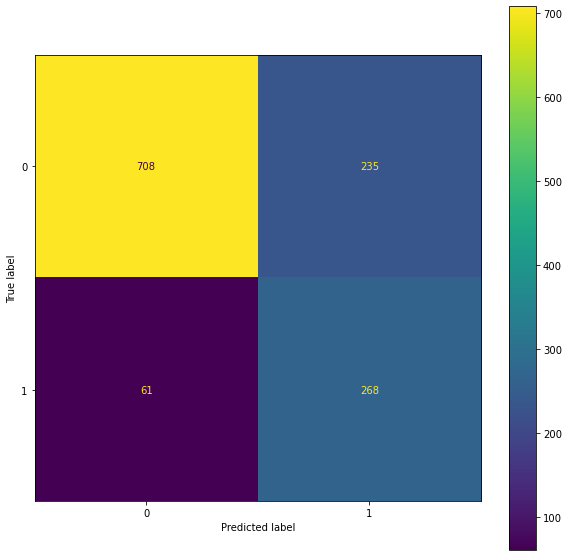

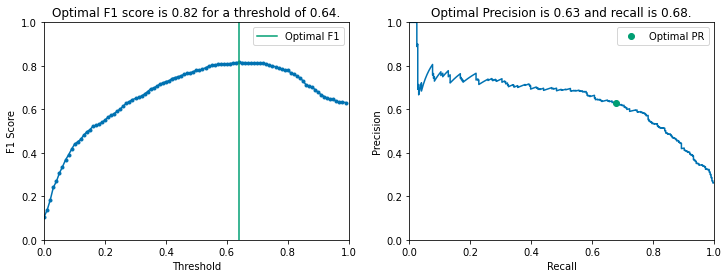

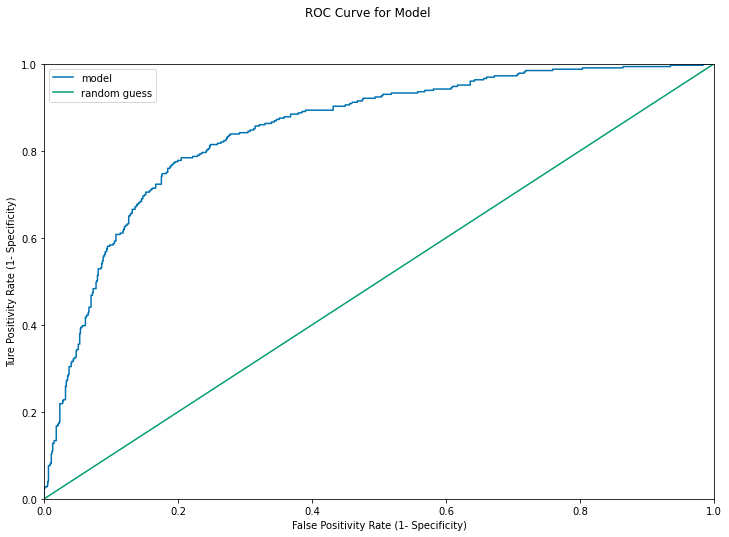

In [43]:
# Confusion matrix
f, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model_features_log, X_train[features], y_train_access, ax=ax)
ax.grid(False)

#Weighted F1 score with optimal threshold if relevant
plot_f1_threshold(X_train[features], y_train_access, model_features_log)

#roc curve
plot_roc(y_train_access, model_features_log.predict_proba(X_train[features]))

In [44]:
predicted = pd.Series(y_pred_log)
predicted = pd.concat((train_data, predicted), axis=1)

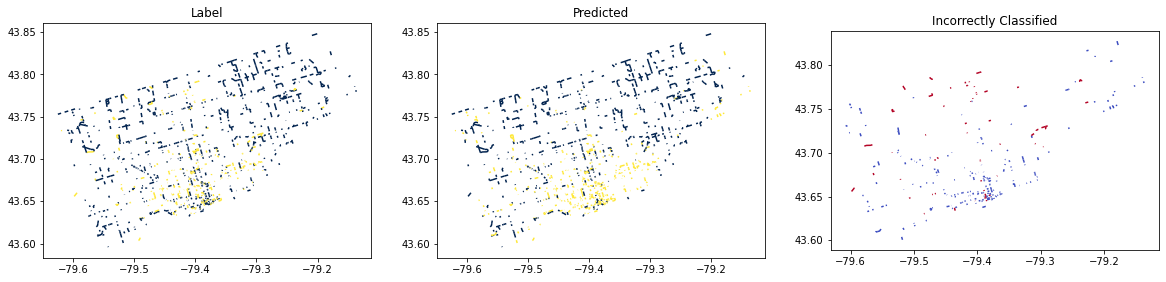

In [45]:
# Plot the above to show the new data. Show with 4 LTS and with the high/low access grouping
# Geoframe
plotr = pd.merge(lts_gpd,
                 predicted[['GEO_ID',0]],
                 how='left',
                 left_on='GEO_ID',
                 right_on='GEO_ID',)

# Find the difference in classification
plotr = plotr.dropna()
plotr['diff'] = plotr['high access'] - plotr[0]
plotr['i or c'] = plotr['diff'].apply(lambda x: 'incorrect' if x != 0 else 'correct')
plotr_diff = plotr[plotr['diff'] != 0]

# Figure
fig, axs = plt.subplots(figsize=(20,12), ncols=3)

# Plotting
plotr.plot(ax=axs[0], column='high access', cmap='cividis')
plotr.plot(ax=axs[1], column=0, cmap='cividis')
#plotr[plotr['i or c'] == 'incorrect'].plot(ax=axs[2], column='i or c', cmap='coolwarm')
plotr_diff.plot(ax=axs[2], column='diff', cmap='coolwarm')

# Attributes
axs[0].title.set_text('Label')
axs[1].title.set_text('Predicted')
axs[2].title.set_text('Incorrectly Classified')
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)

plt.show()

**Next, let's try a support vector machine model.**

Use the normal feature selector function to see CV results without spatial autocorrolation.

In [19]:
feature_selector(model_svm, splits=10, X=X_train.iloc[:,2:], y=y_train_access, i=10)

Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'ped volume from', 'car volume to', 'truck volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'car volume to', 'truck volume to', 'ped volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'car volume to', 'truck volume to', 'ped volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'car volume to', 'truck volume to', 'ped volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'ped volume from', 'car volume to', 'truck volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume 

Use the spatial cross validation function to get a better look at the feature performance.

In [20]:
spatial_cv(model_svm, grouper=X_train['AREA_ID'], splits=len(X_train['AREA_ID'].unique()), X=X_train.iloc[:,2:9], y=y_train_access)

Mean fold weighted F1 Score: 0.8016190933352036
Mean fold accuracy Score: 0.80792030081612
Mean fold MSE: 0.19207969918387993


Finally, select Features to be used in hyper parameter tuning.

In [21]:
features = ['car volume from', 'truck volume from', 'ped volume from',
            'car volume to', 'truck volume to', 'ped volume to',
            'bike lane', 'pop_density',
            'x_region_2', 'x_region_3', 'y_region_2', 'y_region_3']

**Tune hyperparameters**

Use random search, and try using groupkfold for the cv in the tuning.


In [22]:
# Get a set of group kfold using the neighbourhood grouper.
# Unfortunately, the 135 cross validations massively increases runtime of the search.
group_kfold = GroupKFold(n_splits=10)
grouper = X_train['AREA_ID']

neighbour_kfold = group_kfold.split(X_train, y_train_access, grouper)

# Create list to be passed to search.
train_index, val_index = [list(tt) for tt in zip(*neighbour_kfold)]
neighbour_cv = [*zip(train_index, val_index)]

In [23]:
cv = StratifiedKFold(n_splits=10)

# Choose hyper-params
params_svm = {'C': loguniform(1e-3, 1e2)}

# Do the search (might take awhile)
r_search_svm = RandomizedSearchCV(estimator=model_svm,
                                  param_distributions=params_svm,
                                  n_iter=20,
                                  scoring='f1_weighted',
                                  cv=neighbour_cv,
                                 )

r_search_svm.fit(X_train[features], y_train_access)

RandomizedSearchCV(cv=[(array([   0,    2,    3,    4,    5,    6,    7,    8,   11,   13,   14,
         15,   18,   19,   20,   21,   22,   23,   24,   25,   27,   28,
         29,   30,   33,   34,   35,   36,   37,   38,   39,   40,   41,
         42,   43,   44,   45,   46,   47,   48,   49,   50,   54,   55,
         57,   58,   59,   60,   61,   62,   63,   64,   65,   66,   68,
         70,   71,   72,   73,   74,   75,   78,   80,   81,   83,   84,
         85,   86,   87,   88,   91,   92,   93,   94,   95,   96,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  112,  115,  116,  118,  119,  120,  121,  122,  123,  125,
        126,  127,  1...
        680,  688,  692,  695,  710,  713,  716,  727,  735,  743,  766,
        787,  795,  796,  799,  800,  810,  830,  835,  861,  870,  896,
        905,  911,  912,  920,  957,  968,  969,  971,  979,  983,  990,
        997, 1022, 1036, 1037, 1055, 1074, 1092, 1105, 1107, 1123, 1126,
  

In [24]:
print('best weighted score', r_search_svm.best_score_)
print('best estimator: ',r_search_svm.best_estimator_)

best weighted score 0.8128538979968152
best estimator:  SVC(C=78.1152002115502)


In [46]:
model_features_svm = svm.SVC(C=78.1152002115502)
model_features_svm.fit(X_train[features], y_train_access)

y_pred_svm = model_features_svm.predict(X_train[features])

**Model Evaluation**

Metrics, visualizations included

In [47]:
print('accuracy: ', accuracy_score(y_train_access, y_pred_svm))
print('weighted f1: ', f1_score(y_train_access, y_pred_svm, average='weighted'))

accuracy:  0.8930817610062893
weighted f1:  0.8883261859926188


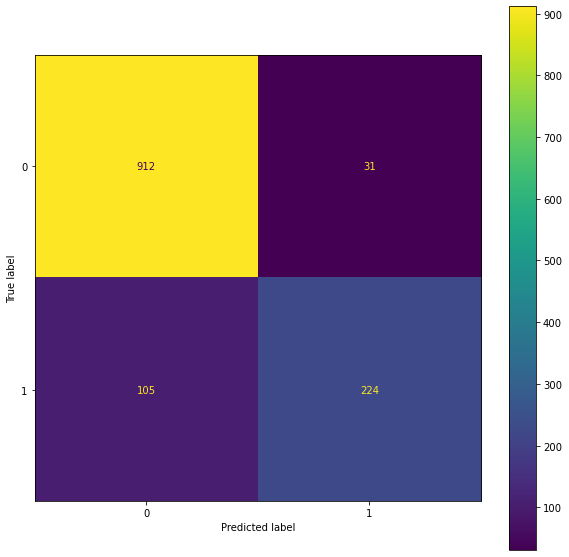

In [48]:
# Confusion matrix
f, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model_features_svm, X_train[features], y_train_access, ax=ax)
ax.grid(False)

#Weighted F1 score with optimal threshold if relevant
#plot_f1_threshold(X_train[features], y_train_access, model_features_svm)

#roc curve
#plot_roc(y_train_access, model_features_svm.predict_proba(X_train[features]))

In [49]:
predicted = pd.Series(y_pred_svm)
predicted = pd.concat((train_data, predicted), axis=1)

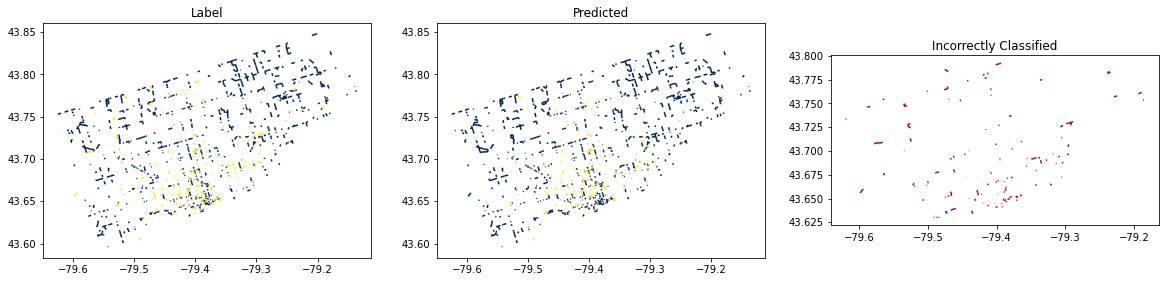

In [50]:
# Plot the above to show the new data. Show with 4 LTS and with the high/low access grouping
# Geoframe
plotr = pd.merge(lts_gpd,
                 predicted[['GEO_ID',0]],
                 how='left',
                 left_on='GEO_ID',
                 right_on='GEO_ID',)

# Find the difference in classification
plotr = plotr.dropna()
plotr['diff'] = plotr['high access'] - plotr[0]
plotr['i or c'] = plotr['diff'].apply(lambda x: 'incorrect' if x != 0 else 'correct')
plotr_diff = plotr[plotr['diff'] != 0]

# Figure
fig, axs = plt.subplots(figsize=(20,12), ncols=3)

# Plotting
plotr.plot(ax=axs[0], column='high access', cmap='cividis')
plotr.plot(ax=axs[1], column=0, cmap='cividis')
#plotr[plotr['i or c'] == 'incorrect'].plot(ax=axs[2], column='i or c', cmap='coolwarm')
plotr_diff.plot(ax=axs[2], column='diff', cmap='coolwarm')

# Attributes
axs[0].title.set_text('Label')
axs[1].title.set_text('Predicted')
axs[2].title.set_text('Incorrectly Classified')
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)

plt.show()

**Finally, let's try a random forest model.**

Use the normal feature selector function to see CV results without spatial autocorrolation.

In [30]:
feature_selector(model_rf, splits=10, X=X_train.iloc[:,2:], y=y_train_access, i=10)

Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'ped volume from', 'car volume to', 'truck volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'car volume to', 'truck volume to', 'ped volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'car volume to', 'truck volume to', 'ped volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'car volume to', 'truck volume to', 'ped volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume from', 'ped volume from', 'car volume to', 'truck volume to', 'x_region_2', 'x_region_3', 'y_region_3']
Selected features: ['bike lane', 'pop_density', 'car volume from', 'truck volume 

Use the spatial cross validation function to get a better look at the feature performance.

In [31]:
spatial_cv(model_rf, grouper=X_train['AREA_ID'], splits=len(X_train['AREA_ID'].unique()), X=X_train.iloc[:,2:9], y=y_train_access)

Mean fold weighted F1 Score: 0.7948841809103282
Mean fold accuracy Score: 0.7913778818823094
Mean fold MSE: 0.20862211811769066


Finally, select Features to be used in hyper parameter tuning.

In [32]:
features = ['car volume from', 'truck volume from', 'ped volume from',
            'car volume to', 'truck volume to', 'ped volume to',
            'bike lane', 'pop_density',
            'x_region_2', 'x_region_3', 'y_region_2', 'y_region_3']

**Tune hyperparameters**

Use random search, and try using groupkfold for the cv in the tuning.

In [33]:
# Get a set of group kfold using the neighbourhood grouper.
# Unfortunately, the 135 cross validations massively increases runtime of the search.
group_kfold = GroupKFold(n_splits=10)
grouper = X_train['AREA_ID']

neighbour_kfold = group_kfold.split(X_train, y_train_access, grouper)

# Create list to be passed to search.
train_index, val_index = [list(tt) for tt in zip(*neighbour_kfold)]
neighbour_cv = [*zip(train_index, val_index)]

In [34]:
cv = StratifiedKFold(n_splits=10)

# Choose hyper-params
params_rf = {'criterion': ('gini', 'entropy'),
             'class_weight': (None, 'balanced'),
             'max_samples': uniform(0.5,1),
             'max_features': uniform(0.5,1)}

# Do the search (might take awhile)
r_search_rf = RandomizedSearchCV(estimator=model_rf,
                                  param_distributions=params_rf,
                                  n_iter=200,
                                  scoring='f1_weighted',
                                  cv=neighbour_cv,
                                 )

r_search_rf.fit(X_train[features], y_train_access)

RandomizedSearchCV(cv=[(array([   0,    2,    3,    4,    5,    6,    7,    8,   11,   13,   14,
         15,   18,   19,   20,   21,   22,   23,   24,   25,   27,   28,
         29,   30,   33,   34,   35,   36,   37,   38,   39,   40,   41,
         42,   43,   44,   45,   46,   47,   48,   49,   50,   54,   55,
         57,   58,   59,   60,   61,   62,   63,   64,   65,   66,   68,
         70,   71,   72,   73,   74,   75,   78,   80,   81,   83,   84,
         85,   86,   87,   88,   91,   92,   93,   94,   95,   96,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  112,  115,  116,  118,  119,  120,  121,  122,  123,  125,
        126,  127,  1...
       1129, 1140, 1143, 1167, 1188, 1194, 1201, 1212, 1269]))],
                   estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'class_weight': (None, 'balanced'),
                                        'criterion': ('gini', 'entropy'),
            

In [35]:
print('best weighted score', r_search_rf.best_score_)
print('best estimator: ',r_search_rf.best_estimator_)

best weighted score 0.8206531748988637
best estimator:  RandomForestClassifier(max_features=0.5920000114461647,
                       max_samples=0.9644851947068951)


In [51]:
model_features_rf = RandomForestClassifier(max_features=0.5920000114461647, max_samples=0.9644851947068951)
model_features_rf.fit(X_train[features], y_train_access)

y_pred_rf = model_features_rf.predict(X_train[features])

**Model Evaluation**

Metrics, visualizations included

In [52]:
print('accuracy: ', accuracy_score(y_train_access, y_pred_rf))
print('weighted f1: ', f1_score(y_train_access, y_pred_rf, average='weighted'))

accuracy:  0.9992138364779874
weighted f1:  0.9992134464904445


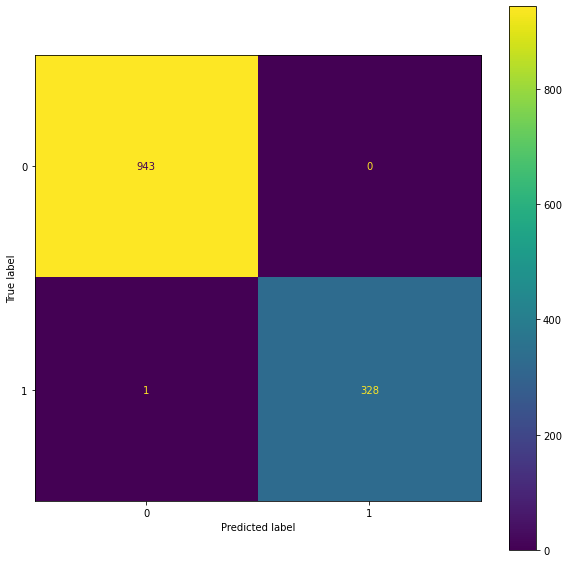

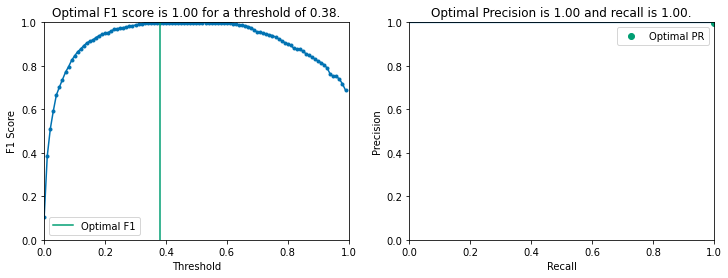

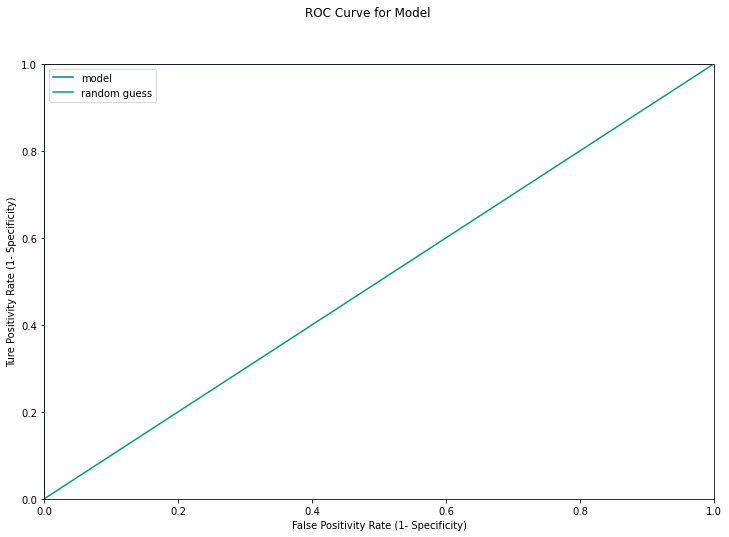

In [53]:
# Confusion matrix
f, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model_features_rf, X_train[features], y_train_access, ax=ax)
ax.grid(False)

#Weighted F1 score with optimal threshold if relevant
plot_f1_threshold(X_train[features], y_train_access, model_features_rf)

#roc curve
plot_roc(y_train_access, model_features_rf.predict_proba(X_train[features]))

In [54]:
predicted = pd.Series(y_pred_rf)
predicted = pd.concat((train_data, predicted), axis=1)

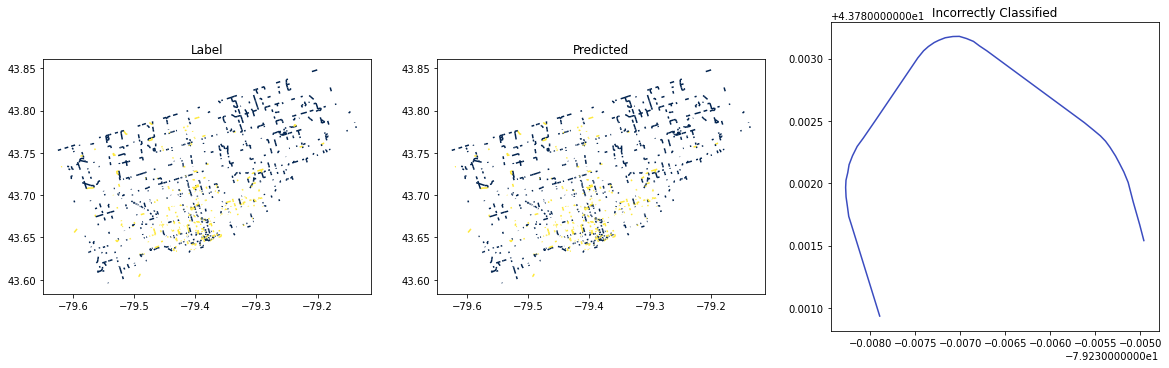

In [55]:
# Plot the above to show the new data. Show with 4 LTS and with the high/low access grouping
# Geoframe
plotr = pd.merge(lts_gpd,
                 predicted[['GEO_ID',0]],
                 how='left',
                 left_on='GEO_ID',
                 right_on='GEO_ID',)

# Find the difference in classification
plotr = plotr.dropna()
plotr['diff'] = plotr['high access'] - plotr[0]
plotr['i or c'] = plotr['diff'].apply(lambda x: 'incorrect' if x != 0 else 'correct')
plotr_diff = plotr[plotr['diff'] != 0]

# Figure
fig, axs = plt.subplots(figsize=(20,12), ncols=3)

# Plotting
plotr.plot(ax=axs[0], column='high access', cmap='cividis')
plotr.plot(ax=axs[1], column=0, cmap='cividis')
#plotr[plotr['i or c'] == 'incorrect'].plot(ax=axs[2], column='i or c', cmap='coolwarm')
plotr_diff.plot(ax=axs[2], column='diff', cmap='coolwarm')

# Attributes
axs[0].title.set_text('Label')
axs[1].title.set_text('Predicted')
axs[2].title.set_text('Incorrectly Classified')
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)

plt.show()

Ranking the three models by f1 score: RF > SVM > LogReg

However, the RF model has a very high f1 score, so it might be overfitting. The second place SVM model still provides a relatively high f1 score, so this is likely the optimal model.